# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [83]:
# Импорт библиотек
import numpy as np 
import pandas as pd 

In [84]:
# Подгрузка данных
data = pd.read_csv('data/Advertising.csv')
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [85]:
data = data.dropna()
data.info()
# Пропуски отсутствуют

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [86]:
# Выделим в качестве целевой переменной признак sales

X = data.drop(columns="sales")
y = data["sales"]
X = np.array(X)
y = np.array(y)

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [87]:
import numpy as np

X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
y = y.reshape(-1, 1)
print(X.shape, y.shape)

(200, 5) (200, 1)


**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [88]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм координатного спуска для случая нормализованных данных:

**Задано:**

* $X=(x_{ij})$ - матрица наблюдений, размерностью $dim(X)=(m, n)$
* $N=1000$ - количество итераций

**Примечание:** *1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.*

**Алгоритм (математическая запись):**
* Создать нулевой вектор параметров $w_0=(0, 0,..., 0)^T$
* Для всех $t=1, 2, ..., N$ итераций:
    * Для всех $k = 1, 2,..., n$:
        * Фиксируем значение всех признаков, кроме $k$-ого и вычисляем прогноз модели линейной регрессии.Для этого исключаем признак $k$-ый из данных и $w_j$ из параметров при построении прогноза.
        Математически это можно записать следующим образом:

        $$h_i = \sum_{j=1}^{k-1} x_{ij}w_{j} + \sum_{j=k+1}^{n} x_{ij}w_j $$

        **Примечание:**
        
        *Обратите, что в данной записи текущий признак под номером $k$ не участвует в сумме.Сравните эту запись с классической записью прогноза линейной регрессии в случае нормированных данных (когда участвуют все признаки):*

        $$h_i = \sum_{j=1}^{n} x_{ij}w_{j}$$ 
        
        * Вычисляем новое значение параметра $k$-ого коэффициента: 
        $$w_k = \sum_{i=1}^{m} x_{ik} (y_i - h_i) = x_k^T(y-h) $$

    * Вычисляем значение функции потерь и сохраняем в историю изменения функции потерь (В оценке функции потерь участвуют все признаки):
        $$\hat{y_i} = \sum_{j=1}^{n}x_{ij}w_j$$
        $$Loss_t = \frac{1}{n} \sum_{i=1}^{m}(y_i-\hat{y_i})^2$$
        
        или в векторном виде:
        
        $$\hat{y} = Xw$$
        $$Loss_t = \frac{1}{n}(y-\hat{y})^T(y-\hat{y})$$
    



**Алгоритм (псевдокод):**
```python

num_iters = #количество итераций
m = # количество строк в матрице X
n = # количество столбцов в матрице X
w = #вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum((X @ w) - y) ** 2)/(len(y))

```

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [89]:
num_iters = 1000 #количество итераций
m = len(X) # количество строк в матрице X
n = len(X[0]) # количество столбцов в матрице X
w = np.zeros((n,1)) #вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] = (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum(((X @ w) - y) ** 2)/(len(y))

In [90]:

w_h = np.squeeze(np.transpose(w))
print(w_h)

[ 42.5000792   -0.95040482 110.15857249  73.47133693  -0.65919361]


Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [91]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
 
print(model.coef_)


[[ 42.5000792   -0.95040482 110.15857249  73.47133693  -0.65919361]]


Если вы все сделали верно, они должны практически совпасть!

Вывод: коэффициенты линейной регрессии и координатоного спуска совпали

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [103]:
X = data.drop('sales', axis=1)
X = np.array(X)

X = (X - np.mean(X))/np.std(X)

**Добавим единичный столбец**

In [104]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [105]:
def mse_error(y_pred, y):
    mse = ((y - y_pred) ** 2).mean()
    return mse # Вычисляем среднее значение реальных продаж
mean_sales = np.mean(y)

# Создаем прогноз, предсказывая все продажи средним значением
y_pred = np.full_like(y, mean_sales)

mse = mse_error(y, y_pred)

print("Наивный прогноз (среднее значение продаж):", y_pred[0])
print("Среднеквадратичная ошибка (MSE) для наивного прогноза:", mse)

Наивный прогноз (среднее значение продаж): [14.0225]
Среднеквадратичная ошибка (MSE) для наивного прогноза: 27.085743750000002


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [106]:

def lin_pred(X,w):
    res = np.zeros([len(X),1])
    for i in range(len(X)):
        res[i] = (np.dot(w,X[i]))
    return res

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [107]:
def stoch_grad_step(X, y, w, train_ind, eta):
    x_element = X[train_ind] # элемент с рандомным индексом
    y_element = y[train_ind]
    gradient = 2 * x_element.T * ((lin_pred(x_element, w)) - y_element) / X.shape[0]
    w_new = w - gradient * eta
    return w_new

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [108]:
# Алгоритм стохастического градиентного спуска
from random import randint

def stochastic_gradient_step(X, y, w, train_ind, eta):
    """
    Perform a stochastic gradient step.

    Parameters:
    - X: numpy array of shape (n_samples, n_features) representing the input features.
    - y: numpy array of shape (n_samples,) representing the target values.
    - w: numpy array of shape (n_features,) representing the weights.
    - train_ind: index of the selected sample.
    - eta: learning rate for the gradient update.

    Returns:
    - weights: updated weights after the stochastic gradient step.
    """

    n_samples, n_features = X.shape

    x_sample = X[train_ind]
    y_sample = y[train_ind]
    
    y_pred = x_sample@w
    gradient = 2*x_sample*(y_pred-y_sample)/n_samples
    weights = w - eta * gradient

    return weights

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

**Постройте график зависимости ошибки от номера итерации**

In [110]:
def stochastic_gradient_descent(X, y, init_w, eta, max_iter, distance_metric):
    """
    Perform stochastic gradient descent.

    Parameters:
    - X: numpy array of shape (n_samples, n_features) representing the input features.
    - y: numpy array of shape (n_samples,) representing the target values.
    - init_w: numpy array of shape (n_features,) representing the initial weights.
    - eta: learning rate for the gradient update.
    - max_iter: number of iters (iterations) to run stochastic gradient descent.
    - distance_metric: threshold for stopping the algorithm based on a specified distance metric.

    Returns:
    - weights: weights vector on which the method converged.
    - errors: list of errors at each iter.
    """

    # Инициализируем расстояние между векторами весов на соседних
    # итерациях большим числом. 
    distance = np.inf
    # Инициализируем вектор весов   
    weights = init_w
    # Список для фиксации ошибок 
    errors = []
    # Счетчик итераций
    iter_num = 0

    while distance > distance_metric and iter_num < max_iter:
        weights_current = weights
        # Генерируем случай индекс 
        random_ind = np.random.randint(X.shape[0])
        
        # Применяем функции созданные ранее 
        weights = stochastic_gradient_step(X, y, weights, random_ind, eta)
        errors.append(mse_error(y, lin_pred(X, weights)))
        
        # Вычисляем растояние между векторами для проверки
        distance = np.linalg.norm(weights_current - weights)
        iter_num += 1

    return weights, errors

Text(0, 0.5, 'MSE')

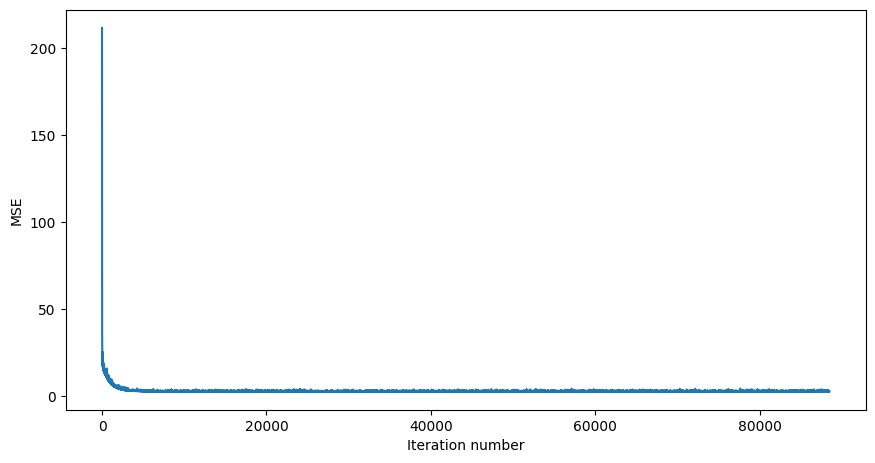

In [116]:
w, errors = stochastic_gradient_descent(X, y, np.zeros(X.shape[1]), 2, 1e+5, 1e-8)

import plotly as plt
import matplotlib.pyplot as plt


%matplotlib inline
fig = plt.figure(figsize=(7, 3))

ax = fig.add_axes([0, 0, 1, 1])
ax.plot(range(len(errors)), errors)
ax.set_xlabel('Iteration number')
ax.set_ylabel('MSE')

**Выведите вектор весов, к которому сошелся метод.**

In [117]:
print(w)

[20.50401019  0.0453926   3.51932436 13.73464079  0.10646034]


**Выведите среднеквадратичную ошибку на последней итерации.**

In [118]:
print(errors[-1])

2.8446927189879636
